# Real-world Data Wrangling

In [138]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data.

### **1.1.** Problem Statement
Depression is a growing concern, and I aim to analyze whether it is more prevalent in the younger generation compared to the older generation. By examining relevant datasets that include the ages of individuals with depression, I will determine which age group is more affected.
Extra: Which gender is more affected by Depression?


### **1.2.** Gather at least two datasets using two different data gathering methods

1- API: https://data.cdc.gov/api/views/8pt5-q6wp/rows.json?accessType=DOWNLOAD
    obtained from: https://catalog.data.gov/dataset/indicators-of-anxiety-or-depression-based-on-reported-frequency-of-symptoms-during-last-7-
    
  2- manually download from https://datasetsearch.research.google.com/search?src=0&query=depression&docid=L2cvMTF0c2M4ODJncQ%3D%3D

#### **Dataset 1**

This dataset were collected to research on Indicators of Anxiety or Depression Based on Reported Frequency of Symptoms During Last 7 Days, for the sake of answering my question i'll focus on 

Type: JSON File from API

Method:  The data was gathered using the "Downloading files" method from API:  https://data.cdc.gov/api/views/8pt5-q6wp/rows.json?accessType=DOWNLOAD source: https://catalog.data.gov/dataset/indicators-of-anxiety-or-depression-based-on-reported-frequency-of-symptoms-during-last-7-

Dataset variables:

*   *Variable 1: Group* => which classification this row follow? for example age, gender ..
*   *Variable 2: Subgroup* => the value of classification, for example if its age then it shows age range.
other variables are irrelevent to my analysis.

In [139]:
data = requests.get("https://data.cdc.gov/api/views/8pt5-q6wp/rows.json?accessType=DOWNLOAD")
print(data)

<Response [200]>


In [140]:
data.raise_for_status()

In [141]:
json_data = data.json()
print(json_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



we got a propblem "IOPub data rate exceeded." so i copied part of the data into a new json file and uploaded it manually

In [142]:
# Load the JSON data
with open('data.json', 'r') as file:
    data = json.load(file)

# The original file contains other metadata, so we extract data
data_list = data['data']

# Define headers
columns = [
  "lost_data", "uuid", "zero", "timestamp1", "null1", "timestamp2", "null2", 
"json_empty", "indicator", "group", "state", "subgroup", "phase", 
"time_period", "time_period_label", "time_period_start_date", 
"time_period_end_date", "value", "low_ci", "high_ci", 
"confidence_interval", "quartile_range"

]
data_set1 = pd.DataFrame(data_list, columns=columns)
data_set1.head(20)


,lost_data,uuid,zero,timestamp1,null1,timestamp2,null2,json_empty,indicator,group,...,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range
0,row-extb-gqyr~iks4,00000000-0000-0000-C8D5-7838C1781E42,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,National Estimate,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,23.5,22.7,24.3,22.7 - 24.3,None
1,row-tj3t-yg8b~fkf8,00000000-0000-0000-F42D-8402E08A9FF7,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,32.7,30.2,35.2,30.2 - 35.2,None
2,row-u6ap.5v3g-aat2,00000000-0000-0000-758F-68E291B7390D,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,25.7,24.1,27.3,24.1 - 27.3,None
3,row-ev4i~mm6r-kem5,00000000-0000-0000-0FD8-13D1AAB00DBA,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,24.8,23.3,26.2,23.3 - 26.2,None
4,row-bfcb-sf22_v4y4,00000000-0000-0000-018A-1D5872725B63,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,23.2,21.5,25,21.5 - 25.0,None
5,row-hx6k.zsep~39ty,00000000-0000-0000-6436-6D37D1D3F0CE,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,18.4,17,19.7,17.0 - 19.7,None
6,row-gm7f~4jdf_hxqy,00000000-0000-0000-5A6B-D22EC1EBA7FB,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,13.6,11.8,15.5,11.8 - 15.5,None
7,row-b77p-wybg~cu8t,00000000-0000-0000-3D26-84E7981C0D15,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,14.4,9,21.4,9.0 - 21.4,None
8,row-f4xe_49yp.7r9j,00000000-0000-0000-9CA8-FAD4FC3AE1BC,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Sex,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,20.8,19.6,22,19.6 - 22.0,None
9,row-4xet-rqa8.6ca4,00000000-0000-0000-DC9F-AE87F51B1B2E,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Sex,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,26.1,25.2,27.1,25.2 - 27.1,None


#### Dataset 2
The dataset is involved into the analysis of depression. The data was consists as a study about the life conditions of people who live in rurales zones. 

Type:  CSV File.

Method:  The data was downloaded manually from Kaggle.

Dataset variables:

*   *Variable 1 Sex* which describes gender; 0 for male and 1 for female
*   *Variable 2 Age*
*   *Variable 3 depressed* -  0 if not depressed and 1 if depressed

In [143]:
data_set2 = pd.read_csv('Data Sets/downloaded_data_set.csv')
data_set2.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issues:

#### Data Set 1

##### Inspecting the dataframe visually

In [144]:
data_set1.head(20)

,lost_data,uuid,zero,timestamp1,null1,timestamp2,null2,json_empty,indicator,group,...,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range
0,row-extb-gqyr~iks4,00000000-0000-0000-C8D5-7838C1781E42,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,National Estimate,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,23.5,22.7,24.3,22.7 - 24.3,None
1,row-tj3t-yg8b~fkf8,00000000-0000-0000-F42D-8402E08A9FF7,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,32.7,30.2,35.2,30.2 - 35.2,None
2,row-u6ap.5v3g-aat2,00000000-0000-0000-758F-68E291B7390D,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,25.7,24.1,27.3,24.1 - 27.3,None
3,row-ev4i~mm6r-kem5,00000000-0000-0000-0FD8-13D1AAB00DBA,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,24.8,23.3,26.2,23.3 - 26.2,None
4,row-bfcb-sf22_v4y4,00000000-0000-0000-018A-1D5872725B63,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,23.2,21.5,25,21.5 - 25.0,None
5,row-hx6k.zsep~39ty,00000000-0000-0000-6436-6D37D1D3F0CE,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,18.4,17,19.7,17.0 - 19.7,None
6,row-gm7f~4jdf_hxqy,00000000-0000-0000-5A6B-D22EC1EBA7FB,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,13.6,11.8,15.5,11.8 - 15.5,None
7,row-b77p-wybg~cu8t,00000000-0000-0000-3D26-84E7981C0D15,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Age,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,14.4,9,21.4,9.0 - 21.4,None
8,row-f4xe_49yp.7r9j,00000000-0000-0000-9CA8-FAD4FC3AE1BC,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Sex,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,20.8,19.6,22,19.6 - 22.0,None
9,row-4xet-rqa8.6ca4,00000000-0000-0000-DC9F-AE87F51B1B2E,0,1718377180,None,1718377180,None,{ },Symptoms of Depressive Disorder,By Sex,...,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,26.1,25.2,27.1,25.2 - 27.1,None


* The data set cotains many null columns that should be removed
* The data set contain a column that all have 0 value and one column that contains empty json. => theres issue in completeness of this data set
* it also contains data thats been encoded in a format thats unreadable for us so we cant understand this column. => accuracy isue
* all uuid are starting with 00000000-0000-0000- which is useless
* all timestamps have the same value 1718377180	 and its not in the correct date time format 
* the age is given in range, we need a specific value to match data set 2 and make analysis. => consistency

##### Inspecting the dataframe programmatically

Create a subset of the dataset to only include the required variables: 

In [145]:
data_set1_filtered = data_set1[data_set1['group'].isin(['By Age', 'By Sex'])]

# Select only the 'subgroup' and 'group' columns
subset_data1 = data_set1_filtered[['subgroup', 'group']]
print(subset_data1.isnull().sum().sum())

0


In [146]:
data_set1.shape

(15858, 22)

In [147]:
print(data_set1.isnull().sum().sum())

39993


In [148]:
subset_data1.describe()

,subgroup,group
count,2106,2106
unique,9,2
top,18 - 29 years,By Age
freq,234,1638


In [149]:
data_set1.describe()

,zero,timestamp1,timestamp2
count,15858.0,1.585800e+04,1.585800e+04
mean,0.0,1.718377e+09,1.718377e+09
std,0.0,0.000000e+00,0.000000e+00
min,0.0,1.718377e+09,1.718377e+09
25%,0.0,1.718377e+09,1.718377e+09
50%,0.0,1.718377e+09,1.718377e+09
75%,0.0,1.718377e+09,1.718377e+09
max,0.0,1.718377e+09,1.718377e+09


In [150]:
subset_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 1 to 15789
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subgroup  2106 non-null   object
 1   group     2106 non-null   object
dtypes: object(2)
memory usage: 49.4+ KB


In [151]:
print(subset_data1.dtypes)

subgroup    object
group       object
dtype: object


In [152]:
data_set1['timestamp1'].dtype

dtype('int64')

In [153]:
data_set1['timestamp1'].sample(3)

9434     1718377180
13879    1718377180
9418     1718377180
Name: timestamp1, dtype: int64

* null values but not in our significant variables
* inconvenient data types
* timestamp1 has wrong data type and same value for all rows.

##### Data Set 2

##### Inspecting the dataframe visually

In [154]:
data_set2.tail(10)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1419,81,7,1,30,1,1,14,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1420,707,52,1,20,1,2,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1421,1317,188,1,20,1,2,10,4,36531058,11210759,...,0,1,0,1,39771502,3942428,0,41031378,50755151.0,0
1422,462,27,1,35,1,6,6,8,21764888,22861940,...,0,1,0,0,13346142,11121784,0,2314812,15926396.0,0
1423,109,15,1,25,1,3,9,5,24343362,16928246,...,0,1,0,0,13346142,53384566,0,86900793,17556848.0,0
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1428,231,12,1,33,0,4,8,5,81678391,22861940,...,0,1,0,1,20019212,16682677,0,69642126,13012488.0,0


* sex should have more descriptive values; female and male instead of 0,1
* we dont need the rows records for non-depressed people

##### Inspecting the dataframe programmatically

In [155]:
print(data_set2.isnull().sum().sum())

20


In [156]:
data_set2.shape

(1429, 23)

In [157]:
data_set2.dtypes

Survey_id                  int64
Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

In [158]:
data_set2.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


Create a subset of the dataset to only include the required variables: 

In [159]:
subset_data2 = data_set2[['sex', 'Age']]

In [160]:
print(subset_data2.isnull().sum().sum())

0


* There are 20 null values in data set 2.

### Tidiness Issues:

#### Data Set 1

##### Inspecting the dataframe visually

* quartile_range have some None values 
* the 'group' column has classifications by age, sex but we need each classification to be in different column (pivoting)
* Multiple variables stored in one column in confidence_interval column

##### Inspecting the dataframe programmatically

In [161]:
data_set1['quartile_range'].sample(5)

15547         None
15068    12.6-15.3
13964    17.7-19.5
1737     26.1-28.9
1937     29.4-34.6
Name: quartile_range, dtype: object

In [162]:
data_set1['confidence_interval'].sample(5)

6119    14.6 - 26.0
2660    30.2 - 37.3
4101    27.8 - 38.0
5121    36.4 - 49.1
2473    41.2 - 47.1
Name: confidence_interval, dtype: object

In [163]:
data_set1.dtypes

lost_data                 object
uuid                      object
zero                       int64
timestamp1                 int64
null1                     object
timestamp2                 int64
null2                     object
json_empty                object
indicator                 object
group                     object
state                     object
subgroup                  object
phase                     object
time_period               object
time_period_label         object
time_period_start_date    object
time_period_end_date      object
value                     object
low_ci                    object
high_ci                   object
confidence_interval       object
quartile_range            object
dtype: object

#### Data Set 2

##### Inspecting the dataframe visually

* the age and gender are not named exactly the same as in data set 1, so we need to make changes when doing analysis.

##### Inspecting the dataframe programmatically

In [164]:
data_set2.dtypes

Survey_id                  int64
Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

In [165]:
data_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

* many data types are not suitable for the values of columns, Married should have only two values (boolean) so int64 is a waste of memory for it.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [166]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted
data_set1_copy = data_set1.copy()
data_set1_copy2 = data_set1.copy()
data_set2_copy = data_set2.copy()


### **Quality Issues:


#### Data Set 1

* The data set cotains many null columns that cant be helpful,and a column that all have 0 value and one column that contains empty json.
*  it also contains data thats been encoded in a format thats unreadable for us so we cant understand this column.

* all timestamps have the same value 1718377180	 and its not in the correct date time format 


*so we create a subset of the data that doesnt contain that columns*

In [167]:
#FILL IN - Apply the cleaning strategy
columns = [
 "uuid",  "indicator", "group", "state", "subgroup", "phase", 
"time_period", "time_period_label", "time_period_start_date", 
"time_period_end_date", "value", "low_ci", "high_ci", 
"confidence_interval", "quartile_range"

]
data_set1_v2 = data_set1_copy[columns]

* all uuid are starting with 00000000-0000-0000- which is useless

In [168]:
data_set1_v2.loc[:, 'uuid'] = data_set1_v2['uuid'].str.replace('00000000-0000-0000-', '', regex=False)


* the age is given in range, we need a specific value to match data set 2 and make analysis.

so i will take the mean of the range.

In [169]:

# Function to calculate the mean of age range
def calculate_mean_age(row):
    if row['group'] == 'By Age':
        age_range = str(row['subgroup'])  # Ensure the value is treated as a string
        if ' years' in age_range:
            # Extract the age range part, assuming the format is always like 'XX - YY years'
            age_range = age_range.split(' years')[0]
            # Split the age range into two numbers
            ages = age_range.split(' - ')
            # Calculate the mean if there are two ages
            if len(ages) == 2:
                mean_age = (int(ages[0]) + int(ages[1])) / 2
                return mean_age
        # If the format is not as expected or there's only one age, return the original value
        try:
            return float(age_range)
        except ValueError:
            return age_range
    return row['subgroup']


In [170]:
data_set1_v2['subgroup'] = data_set1_v2.apply(calculate_mean_age, axis=1)

/tmp/ipykernel_64/1013805795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1_v2['subgroup'] = data_set1_v2.apply(calculate_mean_age, axis=1)


In [171]:
#FILL IN - Validate the cleaning was successful
data_set1_v2.sample(5) 

,uuid,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range
8488,3C34-F7770FE62D09,Symptoms of Anxiety Disorder,By State,Illinois,Illinois,3.2,39,"Sep 29 - Oct 11, 2021",2021-09-29T00:00:00,2021-10-11T00:00:00,26.7,22.7,31,22.7 - 31.0,24.5-27.3
13249,7CEF-AB41F6AF54B8,Symptoms of Depressive Disorder,By State,Maine,Maine,3.9,58,"Jun 7 - Jun 19, 2023",2023-06-07T00:00:00,2023-06-19T00:00:00,22.1,17,27.9,17.0 - 27.9,21.3-22.7
2476,1702-10F6CB93675B,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Delaware,Delaware,1,12,"July 16 - July 21, 2020",2020-07-16T00:00:00,2020-07-21T00:00:00,36.6,30.9,42.6,30.9 - 42.6,31.8-37.1
1820,35B6-D0773A9AAA54,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,9,"June 25 - June 30, 2020",2020-06-25T00:00:00,2020-06-30T00:00:00,37.8,37,38.5,37.0 - 38.5,None
10142,FAC6-D5A822AC455E,Symptoms of Anxiety Disorder or Depressive Dis...,By State,South Dakota,South Dakota,3.4,45,"Apr 27 - May 9, 2022",2022-04-27T00:00:00,2022-05-09T00:00:00,19.2,15.1,23.9,15.1 - 23.9,19.2-28.0


In [172]:
(data_set1_v2.describe())

,uuid,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range
count,15858,15858,15858,15858,15858,15858,15858,15858,15858,15858,15152,15152,15152,15152,10405
unique,15858,3,9,52,78,16,68,78,78,78,597,565,623,11850,796
top,D0EF-C1586F80BD76,Symptoms of Depressive Disorder,By State,United States,United States,1,1,"Jan 9 - Feb 5, 2024",2024-01-09T00:00:00,2024-02-05T00:00:00,31.4,25.1,31.4,26.1 - 34.4,23.2-27.3
freq,1,5286,10404,5454,234,2520,912,234,234,234,94,97,90,6,37


Display the count of null values for each column

In [173]:
data_set1_v2.isnull().sum()

uuid                         0
indicator                    0
group                        0
state                        0
subgroup                     0
phase                        0
time_period                  0
time_period_label            0
time_period_start_date       0
time_period_end_date         0
value                      706
low_ci                     706
high_ci                    706
confidence_interval        706
quartile_range            5453
dtype: int64

The null values are not in our significant columns.

In [174]:
#data_set1_v2 = data_set1_v2.dropna()
#data_set1_v2.isnull().sum()

In [175]:
data_set1_v2.shape

(15858, 15)

#### Data Set 2

* There are 20 null values in data set 2.

In [176]:
data_set2_v2 = data_set2_copy.dropna()
data_set2_v2.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64


* sex should have more descriptive values; Female and Male instead of 0,1

In [177]:
data_set2_v2['sex'] = data_set2_v2['sex'].replace({1: 'Female', 0: 'Male'})

/tmp/ipykernel_64/2921721822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set2_v2['sex'] = data_set2_v2['sex'].replace({1: 'Female', 0: 'Male'})



* we dont need the rows records for non-depressed people

In [178]:
data_set2_v2 = data_set2_v2[data_set2_v2['depressed'] != 0]

In [179]:
data_set2_v2.sample(6)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
42,533,101,Female,20,1,2,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
670,839,20,Female,49,0,2,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1087,1425,92,Female,34,1,7,6,9,83646683,92088379,...,0,1,0,1,82479153,42907844,0,22378116,14704111.0,1
307,1319,201,Female,39,1,7,12,12,16521257,33231894,...,0,1,0,0,74738393,29583948,0,43212012,74960828.0,1
992,1255,234,Female,22,1,2,8,4,28912201,1297245,...,0,0,0,0,26158438,10232042,0,16023824,29450486.0,1
1328,505,77,Female,40,1,8,9,10,20019212,25624592,...,0,0,0,0,17083061,18266418,0,66693719,58304844.0,1


### **Tidiness Issues**

#### Data set 1

* quartile_range have some None values 


we will amke the most common value as default which is 23.2-27.3 (top)

In [180]:
data_set1_v2.describe()

,uuid,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range
count,15858,15858,15858,15858,15858,15858,15858,15858,15858,15858,15152,15152,15152,15152,10405
unique,15858,3,9,52,78,16,68,78,78,78,597,565,623,11850,796
top,D0EF-C1586F80BD76,Symptoms of Depressive Disorder,By State,United States,United States,1,1,"Jan 9 - Feb 5, 2024",2024-01-09T00:00:00,2024-02-05T00:00:00,31.4,25.1,31.4,26.1 - 34.4,23.2-27.3
freq,1,5286,10404,5454,234,2520,912,234,234,234,94,97,90,6,37


In [181]:
data_set1_v2['quartile_range'] = data_set1_v2['quartile_range'].fillna('23.2-27.3')

/tmp/ipykernel_64/4252707357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1_v2['quartile_range'] = data_set1_v2['quartile_range'].fillna('23.2-27.3')


* the 'group' column has classifications by age, sex but we need each classification to be in different column (pivoting)

In [182]:
data_set1_v2_filtered = data_set1_v2[data_set1_v2['group'].isin(['By Age', 'By Sex'])]

# 2. Extract 'Age' and 'Sex' values based on 'group'
data_set1_v2['age'] = data_set1_v2_filtered.apply(lambda row: row['subgroup'] if row['group'] == 'By Age' else None, axis=1)
data_set1_v2['sex'] = data_set1_v2_filtered.apply(lambda row: row['subgroup'] if row['group'] == 'By Sex' else None, axis=1)

# Display the resulting DataFrame
data_set1_v2.head()

/tmp/ipykernel_64/4212991476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1_v2['age'] = data_set1_v2_filtered.apply(lambda row: row['subgroup'] if row['group'] == 'By Age' else None, axis=1)
/tmp/ipykernel_64/4212991476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1_v2['sex'] = data_set1_v2_filtered.apply(lambda row: row['subgroup'] if row['group'] == 'By Sex' else None, axis=1)


,uuid,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,low_ci,high_ci,confidence_interval,quartile_range,age,sex
0,C8D5-7838C1781E42,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,23.5,22.7,24.3,22.7 - 24.3,23.2-27.3,NaN,NaN
1,F42D-8402E08A9FF7,Symptoms of Depressive Disorder,By Age,United States,23.5,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,32.7,30.2,35.2,30.2 - 35.2,23.2-27.3,23.5,None
2,758F-68E291B7390D,Symptoms of Depressive Disorder,By Age,United States,34.5,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,25.7,24.1,27.3,24.1 - 27.3,23.2-27.3,34.5,None
3,0FD8-13D1AAB00DBA,Symptoms of Depressive Disorder,By Age,United States,44.5,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,24.8,23.3,26.2,23.3 - 26.2,23.2-27.3,44.5,None
4,018A-1D5872725B63,Symptoms of Depressive Disorder,By Age,United States,54.5,1,1,"Apr 23 - May 5, 2020",2020-04-23T00:00:00,2020-05-05T00:00:00,23.2,21.5,25,21.5 - 25.0,23.2-27.3,54.5,None


#### Data set 2

* the age and gender were not named exactly the same as in data set 1, so we need to make changes when doing analysis.

In [183]:
data_set2_v2.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

i made the sex column in data set1 named 'sex' as in data set 2 but Age should be renamed 'age'

In [184]:
data_set2_v2.rename(columns={'Age': 'age'}, inplace=True)

In [185]:
data_set2_v2

,Survey_id,Ville_id,sex,age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1,747,57,Female,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
6,849,130,Male,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
10,540,52,Female,84,0,0,1,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
14,603,100,Female,56,1,0,12,2,93596368,21140288,...,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
20,1001,207,Female,40,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1062,214,Female,28,1,4,12,6,30108896,22861940,...,0,0,0,1,53384566,51960976,0,50556335,54349934.0,1
1396,28,3,Female,49,1,2,5,4,12652142,22861940,...,0,1,0,0,27359591,29406002,0,16757162,40883684.0,1
1407,201,12,Female,59,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1415,1408,93,Female,34,1,3,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [186]:
data_set1_v2.columns

Index(['uuid', 'indicator', 'group', 'state', 'subgroup', 'phase',
       'time_period', 'time_period_label', 'time_period_start_date',
       'time_period_end_date', 'value', 'low_ci', 'high_ci',
       'confidence_interval', 'quartile_range', 'age', 'sex'],
      dtype='object')

In [187]:
data_set2_v2.columns

Index(['Survey_id', 'Ville_id', 'sex', 'age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [188]:
#FILL IN - Remove unnecessary variables and combine datasets
ds1_final = data_set1_v2[['age','sex']]
ds2_final = data_set1_v2[['sex','age']]

In [189]:
combined.head()

,age,sex
0,NaN,NaN
1,20-30,None
2,30-40,None
3,40-50,None
4,50-60,None


In [190]:
combined = pd.concat([ds1_final, ds2_final], axis=0)
combined.describe()

,age
count,3276.000000
mean,53.714286
std,19.301090
min,23.500000
25%,34.500000
50%,54.500000
75%,74.500000
max,80.000000


## 4. Update your data store

In [191]:
data_set1_v2.to_csv("raw_data_set1.csv", index=False)  
data_set2_v2.to_csv("raw_data_set2.csv", index=False) 
combined.to_csv("cleaned_combined_data.csv", index=False)

## 5. Answer the research question


##### *Research question:* which age is more affected by depression?

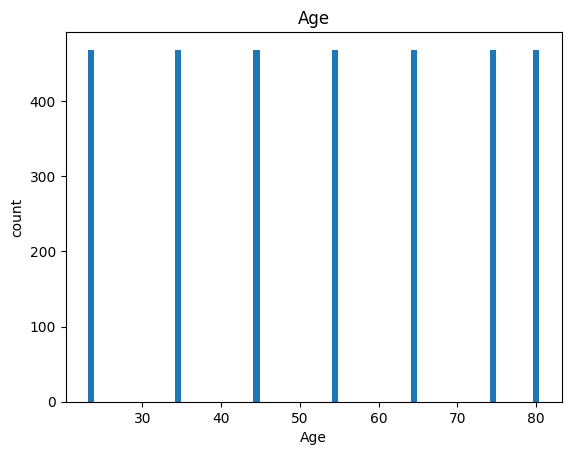

In [192]:
Age_counts = combined['age'].value_counts()
plt.bar(Age_counts.index, Age_counts.values)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

*Answer to research question:* ts the same for all age intervals..

##### *Research question:* which gender is more affected by depression?

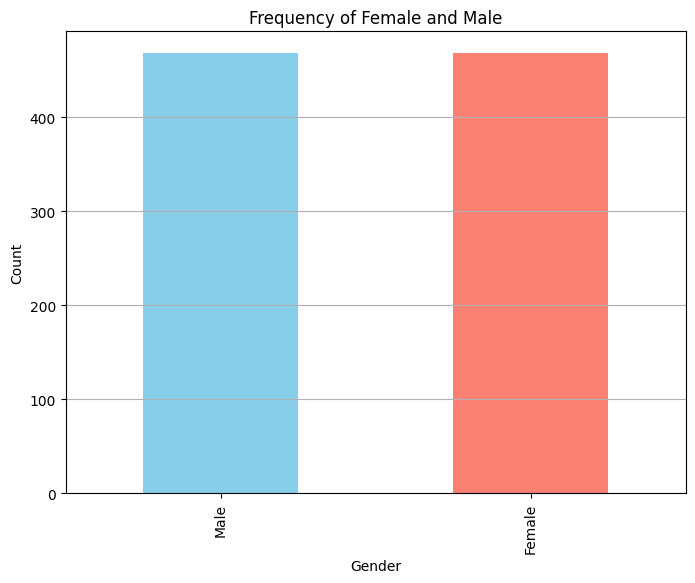

In [193]:
gender_counts = combined['sex'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Frequency of Female and Male')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

*Answer to research question:* The rate is equal in both genders.

### **5.2:** Reflection


I would include more datasets to get more accurate results. More research questions I would further like to explore is the relationship between other factors like religion, marriage status with depression.